<div style="font-family: 'Courier New', monospace; font-size: 14px; background-color: #ffffffff; color: #111111; padding: 10px; line-height: 1.5;">
In this dataset, we will learn the fundamentals of decision trees, including their limitations and advantages.  <br> 
At the end, we will implement a random forest from scratch.
</div>


<h2 style="font-family: 'Georgia', serif; font-size: 32px; color: #333333; font-style: italic;">
Decision Trees
</h2>

<h2 style="font-family: 'Times New Roman', serif; font-size: 28px; color: #333333; font-style: italic;">
Importing Libraries
</h2>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

<div style="font-family: 'Courier New', monospace; font-size: 14px; background-color: white;color:black; padding: 10px;">
## The Iris Dataset

The Iris dataset, introduced by Fisher (1936), is a classic benchmark for classification.  <br>
It contains 150 samples of iris flowers described by four features:

- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

Sample observations:

Sepal L | Sepal W | Petal L | Petal W | Species
--------|---------|---------|---------|--------
5.1     | 3.5     | 1.4     | 0.2     | setosa
4.9     | 3.0     | 1.4     | 0.2     | setosa
4.7     | 3.2     | 1.3     | 0.2     | setosa

The dataset is widely used for demonstrating classification algorithms and basic data exploration.
</div>


In [2]:
iris = load_iris(as_frame=True)

<div style="font-family: 'Courier New', monospace; font-size: 14px; background-color: #ffffffff; padding: 10px;"> 
1. We choose two features for our decision tree <br>
2. We  get the target values
</div>

In [ ]:
X_iris = iris.data[['petal length (cm)','petal width (cm)']].values #type:ignore
y_iris =iris.target #type:ignore

<div style="font-family: 'Courier New', monospace;color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">

1. Creating a decision tree object 

2. Training the decision tree classifier (with hyperparameter max_depth=2, random_state=42 for reproducibility)

<div>

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X_iris,y_iris)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<div style="font-family: 'Courier New', monospace;color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
 . We use export_graphviz to export our tree diagram <br>
 . Later we can use the same library to import and visualize in jupyter notebook

<div>

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names =['petal length (cm)','petal width (cm)'],
    class_names = iris.target_names,
    rounded=True,
    filled=True

)

<div style="font-family: 'Courier New', monospace;color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
 Looking at our tree

<div>

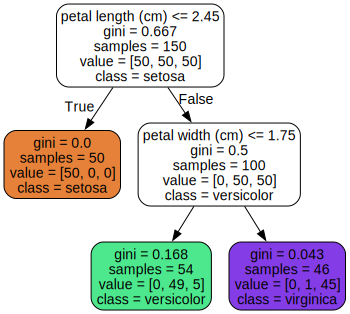

In [ ]:
from graphviz import Source #type:ignore
Source.from_file("iris_tree.dot")



<div style="font-family: 'Courier New', monospace;color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
<b> Note </b>

1. Decision Trees require very little data preparation, and do not require any scaling or centering

<div>


<div style="font-family: 'Courier New', monospace;color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
With predict_proba we are able to  get probability of our instance belonging to each class
<div>

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3) #type:ignore
# 0% probability for setosa 0/54
# 90.7% percent for versicolor 49/54
# 9.3% for iris virginica

array([[0.   , 0.907, 0.093]])

<h2> How does CART algorithm workds <h2>

<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">

1. The CART algorithm searches for the feature k and split condition j that minimizes the Gini impurity.

2. At each node, CART evaluates all combinations of (feature, split) to find the best split.

3. Height of a perfectly balanced tree: h ≈ log₂(m), where m = number of training samples.

4. Training complexity of a decision tree (balanced): 
   O(m * t * n * log₂(m))  
   - m = number of samples  
   - t = number of features  
   - n = number of possible splits per feature  
   - log₂(m) = height of the tree if perfectly balanced

5. Worst-case scenario (highly imbalanced tree, like a linked list):  
   - Height h ≈ m - 1  
   - Training complexity: O(m² * t * n)

</div>


<h2> Hyperparameters of a Decision Tree  <h2>


<div style="font-family: 'Courier New', monospace;color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">

1. max_features  - Maximum number of features that are evaluated for sp;itting at each node <br>

2. max_leaf_nodes -maximum number of leaf nodes

3. min_samples_split - a minimum number of samples a node must have before it can split 

4. min_samples_leaf  - minimum number of samples a leaf node must have to be created

<div>

<h2> Hyperparemeter tuning <h2>

<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">

1. We take 150 samples from the Makemoons dataset.

2. First tree: a decision tree classifier is trained **without any hyperparameter tuning**.

3. Second tree: a decision tree classifier is trained with the hyperparameter  
   - minimum samples per leaf = 5

4. Both classifiers are then **fitted and trained** on the dataset.

</div>


In [11]:
from sklearn.datasets import make_moons

print(type(make_moons))

X_moons,y_moons = make_moons(n_samples=150,noise=0.2,random_state=42)
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 =  DecisionTreeClassifier(random_state=42,min_samples_leaf=5)
tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)


<class 'function'>


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<h2> Visualizing the decision boundaries of Regularized and Unregularized  Decision Trees <h2>

<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">

1. We examine the **decision boundaries** of our two decision trees:

2. First tree: trained **without hyperparameter tuning**  
   - The decision boundary shows signs of **overfitting**.  
   - Decision areas are fragmented into multiple small regions instead of smooth, consistent areas.

3. Second tree: trained with **regularization (minimum samples per leaf = 5)**  
   - The decision boundary is **well-defined**.  
   - Large, consistent decision areas appear instead of many small patches.

4. Observation: Regularization **reduces overfitting** by smoothing the decision boundary and producing fewer, more meaningful regions.

</div>



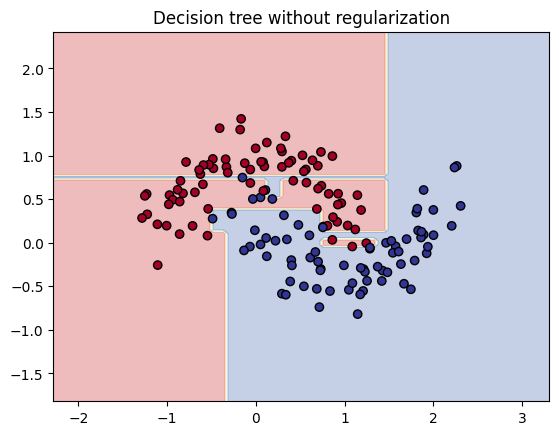

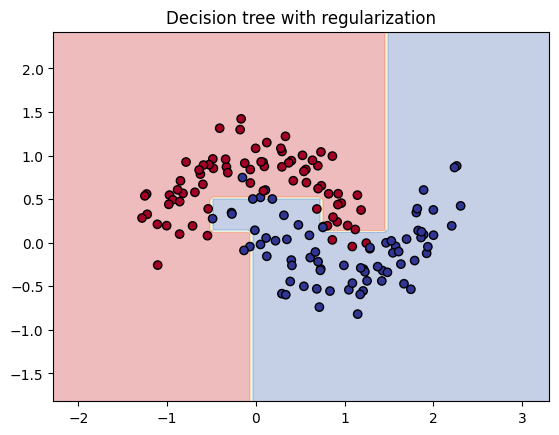

In [ ]:

from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cmap = plt.get_cmap("RdYlBu")

disp = DecisionBoundaryDisplay.from_estimator(
    tree_clf1, X_moons, response_method="predict", cmap=cmap, alpha=0.3
)

disp.ax_.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, edgecolor="k", cmap=cmap)
disp.ax_.set_title("Decision tree without regularization")
plt.show()
disp = DecisionBoundaryDisplay.from_estimator(
    tree_clf2, X_moons, response_method="predict", cmap=cmap, alpha=0.3
)

disp.ax_.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, edgecolor="k", cmap=cmap)
disp.ax_.set_title("Decision tree with regularization")
plt.show()

<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">

1. We evaluate the **scores** of our two classifiers on both the **training** and **test** sets.

2. First tree (no regularization):  
   - Training set score ≈ 100% (perfect)  
   - Test set score ≈ 90%  
   - Observation: high training accuracy but lower test accuracy indicates **overfitting**.

3. Second tree (with regularization, minimum samples per leaf = 5):  
   - Training set score ≈ 94%  
   - Test set score ≈ 91%  
   - Observation: slight decrease in training accuracy, but improved test performance indicates **reduced variance** and better generalization.

4. Insight: Regularization **trades a little bias for lower variance**, improving test set performance while slightly reducing training set performance.

</div>


In [ ]:
x_moon_test,y_moon_test = make_moons(n_samples=1000,random_state=42,noise=0.2) #test_set

print(tree_clf1.score(X_moons,y_moons))
print(tree_clf1.score(x_moon_test,y_moon_test))



print(tree_clf2.score(X_moons,y_moons))
print(tree_clf2.score(x_moon_test,y_moon_test))

1.0
0.901
0.9466666666666667
0.918


<h2> Regression with decision trees <h2>

<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">

1. Note: Decision tree regression works **similarly to classification trees**.

2. Difference in splitting criterion:  
   - Classification tree: splits minimize **Gini impurity** or **entropy**.  
   - Regression tree: splits minimize **sum of squared errors (SSE)** or **mean squared error (MSE)** of the target.

3. Mechanism is the same:  
   - Iterate over all features and possible splits.  
   - Evaluate the criterion for each split.  
   - Choose the split that best improves the criterion.

</div>


In [25]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
#generating a synthetic quadradic dataset
X_quad = np.random.rand(200,1) -0.5
y_quad = X_quad**2 +0.025*np.random.randn(200,1)
tree_regressor = DecisionTreeRegressor(max_depth=2)
tree_regressor.fit(X_quad,y_quad)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


<h1> Decision trees exercises <h1>

<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
a. Get 10000 training samples from make_moons
</div>


In [ ]:
X,y = make_moons(n_samples=10000,noise=0.4)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)





<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #f5f5f5; padding: 10px;">
b .Perform gid search
</div>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_parameters ={
     'max_depth':list(range(1,20)),
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,4],
     'max_leaf_nodes':[2,4,6,7,10,12,14,17]
}

classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=grid_parameters,
    cv=5,
    n_jobs=-1
)


grid_search.fit(x_train,y_train)

print("Best parameters",grid_search.best_params_)


Best parameters {'max_depth': 6, 'max_leaf_nodes': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}




<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
c. look at the accuracy score of fine tuned model
</div>

In [ ]:
print(grid_search.score(x_train,y_train))
print(grid_search.score(x_test,y_test))


0.862625
0.85





<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
d. Creating 1000 subsets of the training set 



1. We use **ShuffleSplit** to create multiple subsets of the training data.

2. Parameters:  
   - n_trees = 1000 → number of subsets (and future trees)  
   - n_instances = 100 → size of each subset

3. Code explanation:  
   - `ShuffleSplit` generates indices for 1,000 random subsets of `x_train`.  
   - For each subset, we select `X_mini_train` and `y_mini_train` according to the sampled indices.  
   - Each subset is appended to `mini_sets`.

4. Purpose:  
   - We create **different training sets** for each of the 1,000 decision trees.  
   - This is typically used in **bagging or random forest** to increase diversity among the trees.

</div>


In [61]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(x_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(x_train):
    X_mini_train = x_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))


<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
e. Looking at the average performance of 1000 decision tree classifiers 
</div>

In [ ]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

np.float64(0.7966205)



<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
f. store the predictions for each sample from each decisiont ree
</div>

<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">

1. Create an empty NumPy array to store predictions from all trees:  
   - `Y_pred = np.empty([n_trees, len(x_test)], dtype=np.uint8)`  
   - Shape: rows = number of trees, columns = size of test set

2. Loop through each tree and predict on the test set:  
   - `for tree_index, tree in enumerate(forest):`  
     `Y_pred[tree_index] = tree.predict(x_test)`

3. Resulting array structure:  
[
[pred_tree1_sample1, pred_tree1_sample2, ...],
[pred_tree2_sample1, pred_tree2_sample2, ...],
...
]



4. Purpose:  
- Each row = predictions of one tree  
- Each column = predictions for one test sample across all trees  
- This structure allows aggregating predictions later (e.g., majority vote for classification)

</div>

In [ ]:
Y_pred = np.empty([n_trees, len(x_test)], dtype=np.uint8)  # creates  empty numpy array with  size of  number_of_trees x len(x_test)
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(x_test)

#resulting array -> [ 
#                   [0,1],
#                   [0,1] ,
#. ]                           



<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">
g. For each training instance we take majority prediction 



1. Aggregate predictions from all trees using **majority voting**:  
   - `y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)`

2. How it works:  
   - Each **column** in `Y_pred` corresponds to a single test sample.  
   - Each **row** corresponds to predictions from one tree.  
   - For each test sample, we take **all predictions from all trees** (i.e., the column) and determine the **most common value** (majority vote).  

3. Resulting array:  
   - `y_pred_majority_votes` contains one prediction per test sample, based on majority voting across all trees.  
   
   - Example: `[ [0, 1, 1, 0, ...] ]`  

4. Purpose:  
   - Combines predictions of individual trees to produce the **final ensemble prediction**.  
   - Reduces variance and improves generalization compared to a single tree.

</div>


In [ ]:
from scipy.stats import mode
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)
#resulting array  y_pred_majority_votes->  [  [0,1] ]            


<div style="font-family: 'Courier New', monospace; color:black; font-size: 14px; background-color: #ffffffff; padding: 10px;">

1. Compute the accuracy of the ensemble predictions:  
   - `accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))`

2. Explanation:  
   - `y_pred_majority_votes` is often a 2D array with shape (1, n_samples).  

   - `.reshape([-1])` converts it into a **1D array** of length n_samples.  
   
   - `accuracy_score` compares the predicted labels to the true labels (`y_test`) to calculate the proportion of correct predictions.

3. Purpose:  
   - Obtain the **final accuracy** of the random forest classifier on the test set.

</div>


In [ ]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8605

<div style="font-family: 'Courier New', monospace; color:black; font-size: 12px; background-color: #f5f5f5; padding: 10px; text-align: center;">

🎉 Congratulations! 🎉

You have **improved the accuracy** and have successfully implemented a **Random Forest classifier** from scratch.

</div>


<div style="font-family: 'Courier New', monospace; color:#111111; font-size: 14px; background-color: #f5f5f5; padding: 10px; line-height:1.5;">
<b>Key points about Decision Trees:</b>
<ul>
    <li>Decision trees can easily overfit the training data, so hyperparameter tuning is important.</li>
    <li>They tend to have decision boundaries orthogonal to feature axes, which can cause issues if the dataset is rotated.</li>
    <li>Decision trees are highly interpretable, allowing insights into the model and easy explanation to stakeholders.</li>
    <li>No feature scaling is required, which simplifies preprocessing.</li>
    <li>They require little to no data preprocessing, making them convenient to use.</li>
</ul>
</div>
